In [14]:
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
import utils
from icecream import ic
#import seaborn as sns
#sns.set(color_codes=True)
data_dir= 'Dataset Preview/Inv3D preview complete V2/data/train/'

In [20]:
path = data_dir + '00'

img = utils.load_warped_document_chw(path)
img = img.transpose(0,1).transpose(1,2)

wc = np.load(path + '/warped_WC.npz')['warped_WC']
bm = np.load(path + '/warped_BM.npz')['warped_BM']


wc, bm = utils.tight_crop_wc_bm(wc, bm)

In [21]:
import augmentationsk
wc_dummy = utils.load_wc(data_dir + '00').transpose(0,1).transpose(1,2)
wc_dummy = wc_dummy.numpy()
img, wc_dummy = augmentationsk.tight_crop(img, wc_dummy)
img = cv2.resize(img, (256,256), interpolation=cv2.INTER_NEAREST)

In [22]:
img = torch.from_numpy(img).transpose(2,1).transpose(1,0).unsqueeze(0)
ic(img.shape)
#img = torch.from_numpy(img).float()
#img = img.unsqueeze(0)
ic(bm.shape)
"BM shape needs to be (N, H, W, C)"
#n, c, h, w = img.shape
unwarped_img = utils.unwarp_image_crop(img,bm.unsqueeze(0))
ic(unwarped_img.shape)

ic| img.shape: torch.Size([1, 3, 256, 256])
ic| bm.shape: torch.Size([256, 256, 2])
ic| unwarped_img.shape: (256, 256, 3)


(256, 256, 3)

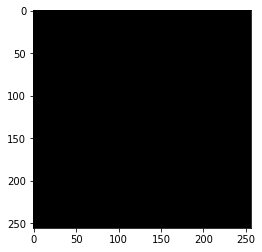

In [23]:
#unwarped_img = torch.from_numpy(unwarped_img).transpose(0,1).transpose(1,2).numpy()
plt.imshow(unwarped_img)

In [6]:
unwarped_img.shape

(256, 256, 3)